In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [4]:
img_width=180
img_height=180

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names


In [40]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                     image_size=(img_height,img_width),
                                                     batch_size=32,
                                                     shuffle=False,
                                                     validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 359 files belonging to 36 classes.


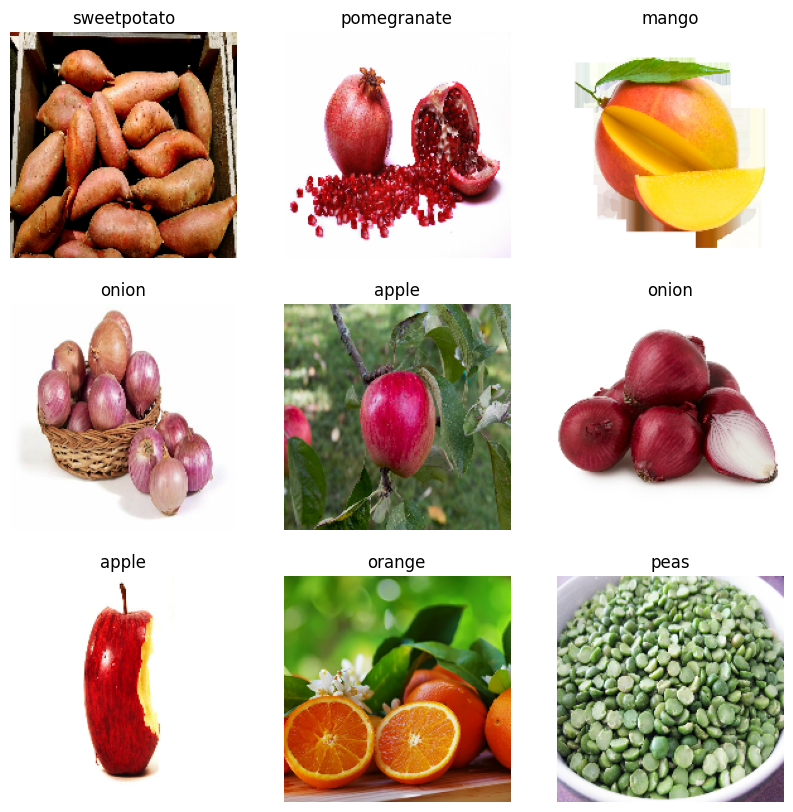

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
        

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))  # Ensure data_cat is defined
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [15]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 507ms/step - accuracy: 0.0542 - loss: 3.5352 - val_accuracy: 0.2479 - val_loss: 2.5703
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 460ms/step - accuracy: 0.2183 - loss: 2.6732 - val_accuracy: 0.4245 - val_loss: 1.9431
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.3503 - loss: 2.2378 - val_accuracy: 0.6182 - val_loss: 1.3410
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 450ms/step - accuracy: 0.4791 - loss: 1.7866 - val_accuracy: 0.7550 - val_loss: 0.8629
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.6361 - loss: 1.2301 - val_accuracy: 0.8433 - val_loss: 0.6375
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 450ms/step - accuracy: 0.7598 - loss: 0.8179 - val_accuracy: 0.9003 - val_loss: 0.4093
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 444ms/step - accuracy: 0.8494 - loss: 0.5035 - val_accuracy: 0.9202 - val_loss: 0.3800
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 444ms/step - accuracy: 0.8861 - loss: 0.3852 - val_accu

Text(0.5, 1.0, 'Loss')

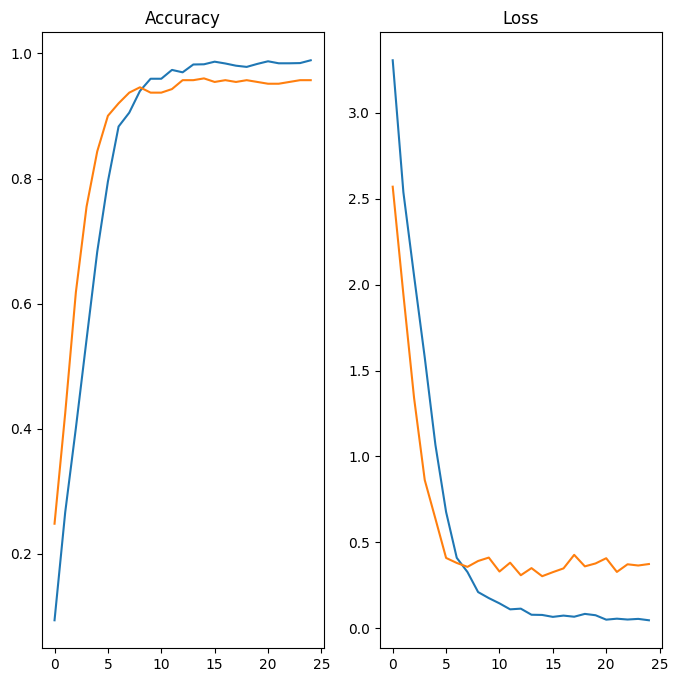

In [16]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [35]:
image='corn.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [36]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [37]:
score=tf.nn.softmax(predict)

In [38]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 85.93


In [39]:
model.save('Image_classify.keras')